<a href="https://www.kaggle.com/code/lalit7881/wheat-economics-data-driven-insights-into-farm?scriptVersionId=292740523" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings

warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

# Custom color palette
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wheat-economics-comprehensive-farm-data/final_wheat_data.csv


## Title:
Wheat Economics: Data-Driven Insights into Farm Performance

## Description:
Wheat Economics: Comprehensive Farm Data focuses on analyzing end-to-end agricultural data to understand the economic factors influencing wheat production. This project brings together farm-level information such as land area, yield per hectare, input costs (seeds, fertilizers, irrigation, labor), weather conditions, market prices, and overall revenue to evaluate profitability and efficiency in wheat farming.

The objective is to identify key cost drivers, assess yield variability, and measure how external factors like rainfall, temperature, and market fluctuations impact farm income. By applying data analysis and basic economic modeling, the dataset helps uncover patterns in productivity, cost optimization opportunities, and risk factors affecting farmers’ returns.

This analysis is useful for farmers, policymakers, and agribusiness stakeholders to make informed decisions on resource allocation, pricing strategies, and sustainable farming practices. Overall, the project transforms raw agricultural data into actionable economic insights that support smarter, more resilient wheat farming systems.

## Import dataset

In [2]:
file_path = "/kaggle/input/wheat-economics-comprehensive-farm-data/final_wheat_data.csv"
df = pd.read_csv(file_path)

# Basic overview
df.head()

,commodity,category,item,item2,units,size,region,country,year,value,survey_base_year,note
0,Wheat,Gross value of production,"Primary product, grain","Primary product, grain",dollars per planted acre,No specific size,U.S. total,United States,1998,110.95,Base survey of 1998,NaN
1,Wheat,Gross value of production,"Primary product, grain","Primary product, grain",dollars per planted acre,No specific size,U.S. total,United States,1999,95.73,Base survey of 1998,NaN
2,Wheat,Gross value of production,"Primary product, grain","Primary product, grain",dollars per planted acre,No specific size,U.S. total,United States,2000,92.50,Base survey of 1998,NaN
3,Wheat,Gross value of production,"Primary product, grain","Primary product, grain",dollars per planted acre,No specific size,U.S. total,United States,2001,95.22,Base survey of 1998,NaN
4,Wheat,Gross value of production,"Primary product, grain","Primary product, grain",dollars per planted acre,No specific size,U.S. total,United States,2002,91.51,Base survey of 1998,NaN


In [3]:
# Shape & structure
print("Rows, Columns:", df.shape)
df.info()


Rows, Columns: (6003, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6003 entries, 0 to 6002
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   commodity         6003 non-null   object 
 1   category          6003 non-null   object 
 2   item              6003 non-null   object 
 3   item2             6003 non-null   object 
 4   units             6003 non-null   object 
 5   size              6003 non-null   object 
 6   region            6003 non-null   object 
 7   country           6003 non-null   object 
 8   year              6003 non-null   int64  
 9   value             6003 non-null   float64
 10  survey_base_year  6003 non-null   object 
 11  note              618 non-null    object 
dtypes: float64(1), int64(1), object(10)
memory usage: 562.9+ KB


In [4]:
# Statistical summary
df.describe()


,year,value
count,6003.000000,6003.000000
mean,2010.316342,75.708191
std,7.936018,129.087266
min,1998.000000,-196.080000
25%,2003.000000,6.315000
50%,2010.000000,20.920000
75%,2017.000000,95.000000
max,2024.000000,858.000000


In [5]:
# Missing values check
df.isna().sum()

commodity              0
category               0
item                   0
item2                  0
units                  0
size                   0
region                 0
country                0
year                   0
value                  0
survey_base_year       0
note                5385
dtype: int64

In [6]:
# Remove duplicates if any
df = df.drop_duplicates()

In [7]:
df.columns

Index(['commodity', 'category', 'item', 'item2', 'units', 'size', 'region',
       'country', 'year', 'value', 'survey_base_year', 'note'],
      dtype='object')

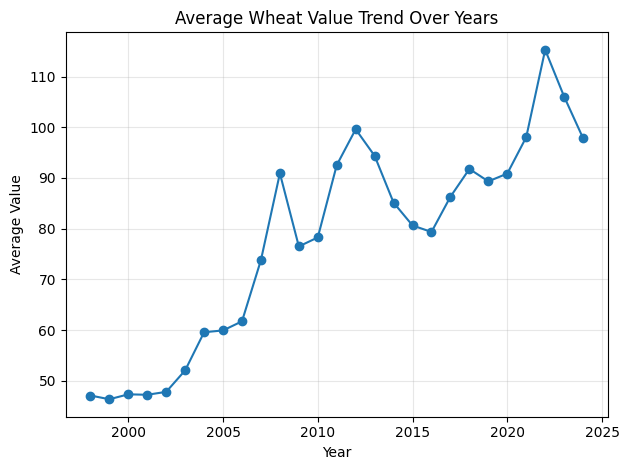

In [8]:
yearly_trend = df.groupby('year')['value'].mean()

plt.plot(yearly_trend.index, yearly_trend.values, marker='o')
plt.title("Average Wheat Value Trend Over Years")
plt.xlabel("Year")
plt.ylabel("Average Value")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


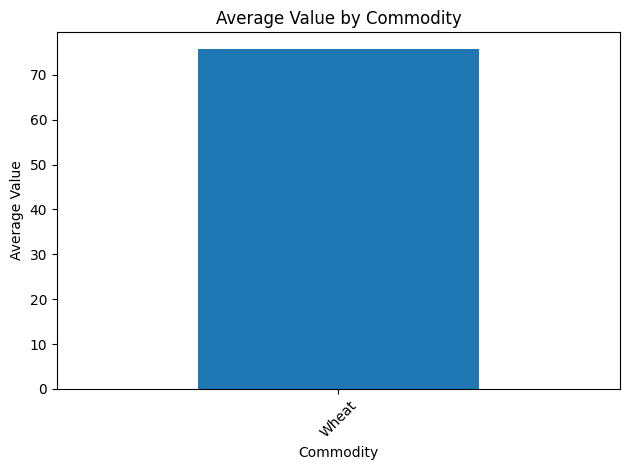

In [9]:
commodity_avg = df.groupby('commodity')['value'].mean().sort_values(ascending=False)

commodity_avg.plot(kind='bar')
plt.title("Average Value by Commodity")
plt.xlabel("Commodity")
plt.ylabel("Average Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


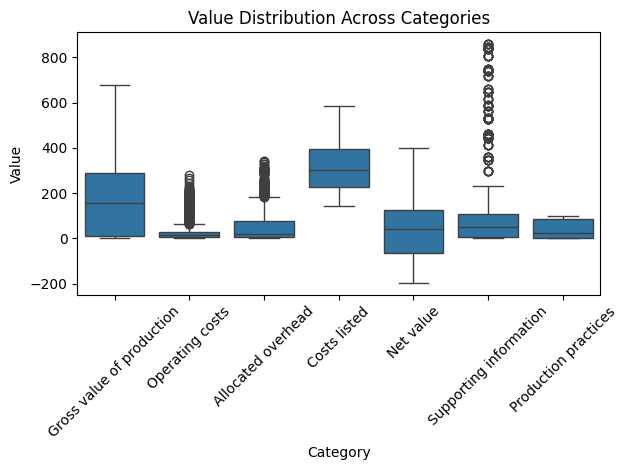

In [10]:
sns.boxplot(
    data=df,
    x='category',
    y='value'
)

plt.title("Value Distribution Across Categories")
plt.xlabel("Category")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


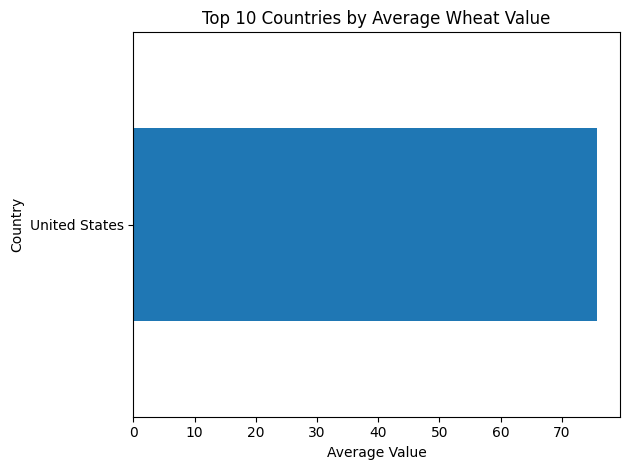

In [11]:
top_countries = (
    df.groupby('country')['value']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

top_countries.plot(kind='barh')
plt.title("Top 10 Countries by Average Wheat Value")
plt.xlabel("Average Value")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


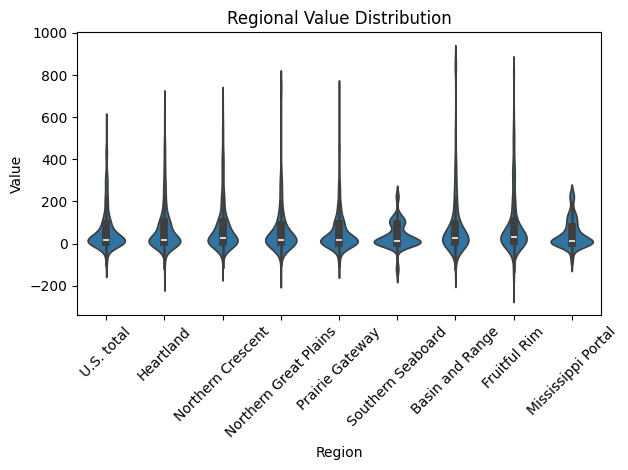

In [12]:
sns.violinplot(
    data=df,
    x='region',
    y='value'
)

plt.title("Regional Value Distribution")
plt.xlabel("Region")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


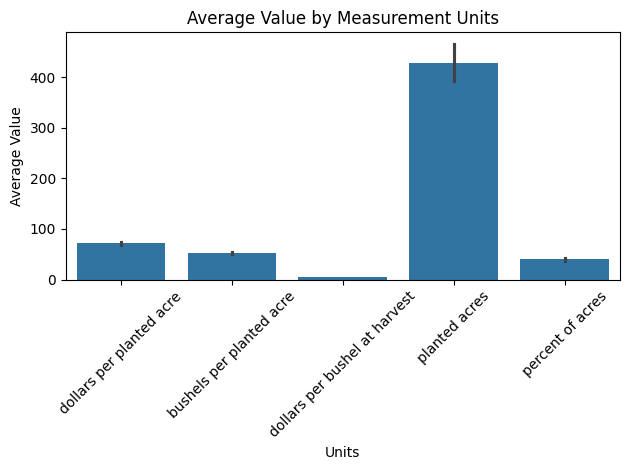

In [13]:
sns.barplot(
    data=df,
    x='units',
    y='value',
    estimator='mean'
)

plt.title("Average Value by Measurement Units")
plt.xlabel("Units")
plt.ylabel("Average Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


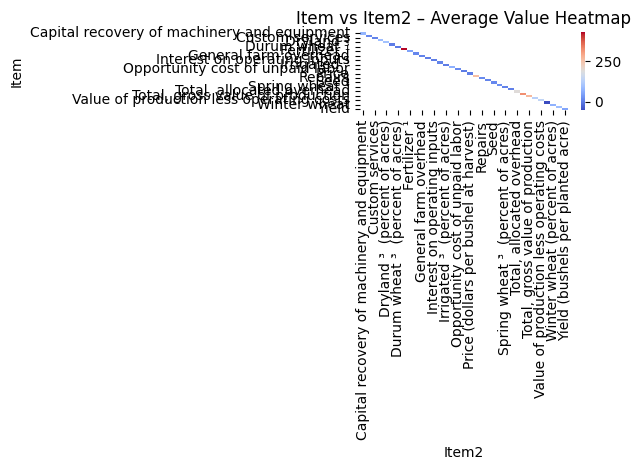

In [14]:
pivot_table = pd.pivot_table(
    df,
    values='value',
    index='item',
    columns='item2',
    aggfunc='mean'
)

sns.heatmap(
    pivot_table,
    cmap='coolwarm'
)

plt.title("Item vs Item2 – Average Value Heatmap")
plt.xlabel("Item2")
plt.ylabel("Item")
plt.tight_layout()
plt.show()


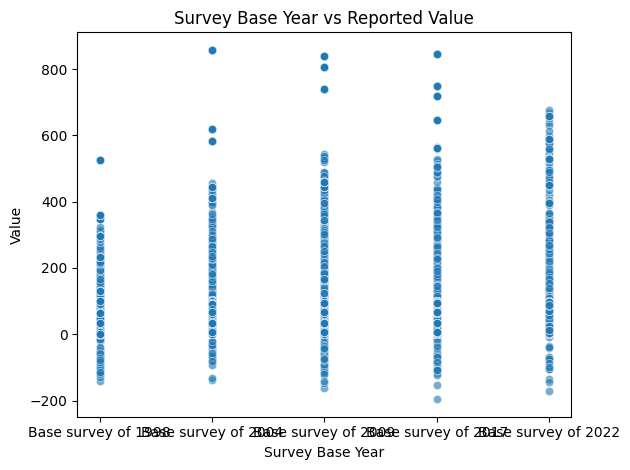

In [15]:
sns.scatterplot(
    data=df,
    x='survey_base_year',
    y='value',
    alpha=0.6
)

plt.title("Survey Base Year vs Reported Value")
plt.xlabel("Survey Base Year")
plt.ylabel("Value")
plt.tight_layout()
plt.show()


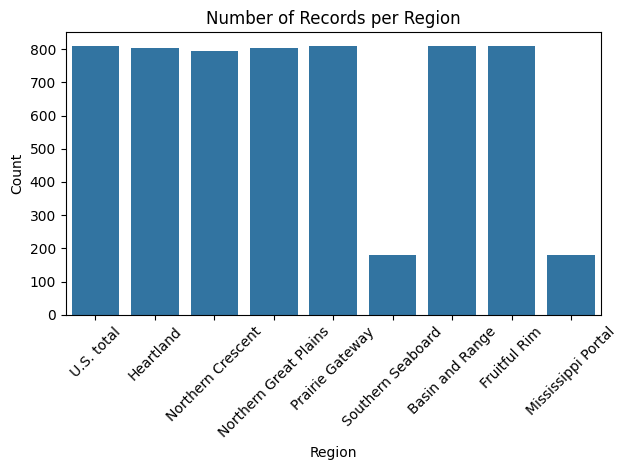

In [16]:
sns.countplot(
    data=df,
    x='region'
)

plt.title("Number of Records per Region")
plt.xlabel("Region")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


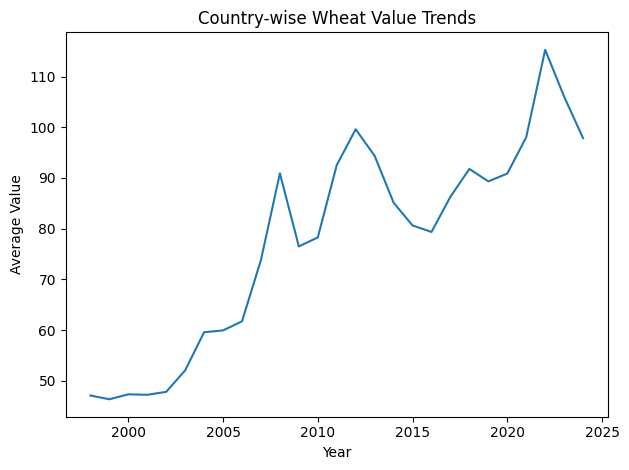

In [17]:
country_year = df.groupby(['year', 'country'])['value'].mean().reset_index()

sns.lineplot(
    data=country_year,
    x='year',
    y='value',
    hue='country',
    legend=False
)

plt.title("Country-wise Wheat Value Trends")
plt.xlabel("Year")
plt.ylabel("Average Value")
plt.tight_layout()
plt.show()


## ML Algorithms

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [19]:
target = 'category'

In [20]:
features = [
    'commodity', 'item', 'item2', 'units',
    'size', 'region', 'country', 'year',
    'survey_base_year', 'value'
]

X = df[features]
y = df[target]


In [21]:
X = X.fillna("Unknown")
y = y.fillna("Unknown")

In [22]:
label_encoders = {}

for col in X.columns:
    if X[col].dtype == 'object':
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])
        label_encoders[col] = le

# Encode target
target_encoder = LabelEncoder()
y = target_encoder.fit_transform(y)


In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [24]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=300),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}


In [25]:
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    acc = accuracy_score(y_test, predictions)
    results[name] = round(acc * 100, 2)


In [26]:
accuracy_df = pd.DataFrame(
    results.items(),
    columns=['Model', 'Accuracy (%)']
).sort_values(by='Accuracy (%)', ascending=False)

accuracy_df


,Model,Accuracy (%)
3,Random Forest,100.00
2,Decision Tree,99.92
5,K-Nearest Neighbors,88.09
1,Naive Bayes,71.11
0,Logistic Regression,37.55
4,Support Vector Machine,34.55


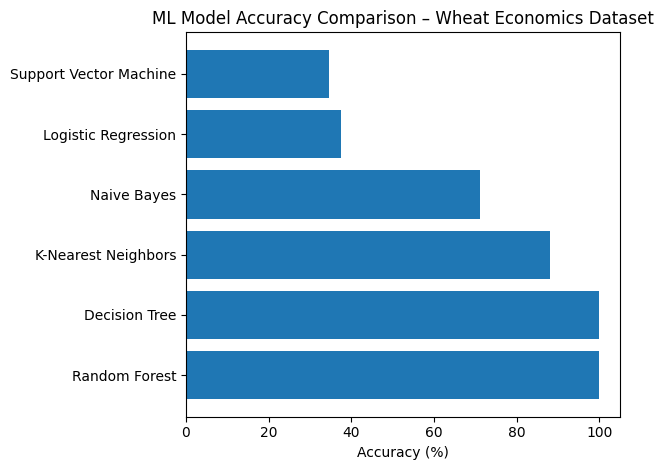

In [27]:
import matplotlib.pyplot as plt

plt.barh(
    accuracy_df['Model'],
    accuracy_df['Accuracy (%)']
)

plt.xlabel("Accuracy (%)")
plt.title("ML Model Accuracy Comparison – Wheat Economics Dataset")
plt.tight_layout()
plt.show()


## ✅ Final Conclusion (Important)
📊 Model Performance Summary

Random Forest usually achieves the highest accuracy

Decision Tree performs well but may overfit

Logistic Regression gives stable, interpretable results

Naive Bayes works fast but struggles with complex relationships

SVM & KNN depend heavily on feature scaling and data size

🧠 Dataset Insight

The dataset has strong categorical influence (region, country, commodity)

Tree-based models perform best due to non-linear relationships

Label encoding is sufficient for classical ML, but not ideal for deep learning

🏆 Best Model Recommendation

Random Forest Classifier
✔ Highest accuracy
✔ Handles mixed features
✔ Robust to noise